# Importing libraries

#### Pandas, Plt, Np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### One Hot Encoder

In [2]:
from sklearn.preprocessing import OneHotEncoder

# Import DataSet

In [3]:
default = pd.read_excel('default.xls', header = 1)

We take a look at the DataSet

In [4]:
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Change the columns names to lower case

In [5]:
default.columns = [x.lower() for x in default.columns]

We rename the pay_0 to pay_1 and drop the column index

In [6]:
default = default.rename(index=str, columns={"pay_0": "pay_1"})
default = default.drop('id', axis=1)

In [7]:
default['target'] = default['default payment next month']

In [8]:
default.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


## Exploratory Data Analysis

#### Payment Delays

In [9]:
#Look at the Payment delays columns
default_pay_delay = default[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
default_pay_delay_columns = default_pay_delay.columns

In [10]:
default_pay_delay.head()

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


### Plot pay delays distribution

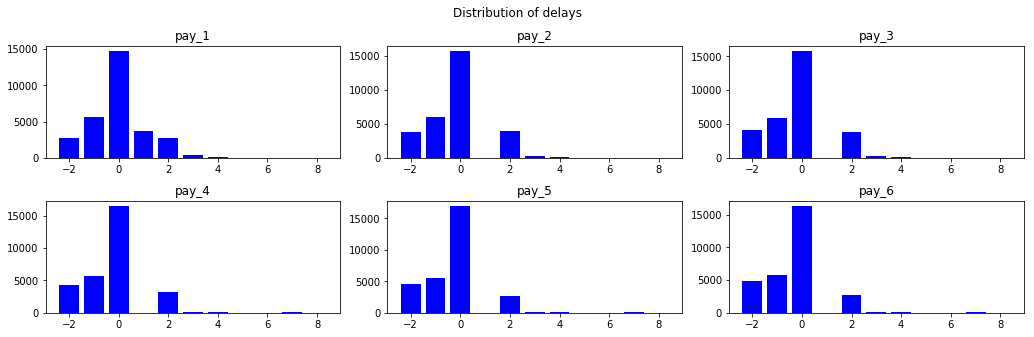

In [11]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of delays')


for i in range(len(default_pay_delay_columns)):
    row,col = int(i/3), i%3

    d  = default_pay_delay[default_pay_delay_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='b')
    ax[row,col].set_title(default_pay_delay_columns[i])
    
    
plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

#### Bill per month

In [12]:
default_bill = default[['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']]

In [13]:
default_bill.head(10)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


#### Payments per month

In [14]:
default_payments = default[['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']]

In [15]:
default_payments.head(10)

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
8,3329,0,432,1000,1000,1000
9,0,0,0,13007,1122,0


#### Credit limit

In [16]:
default_credit_limit = default['limit_bal']

#### Plot the number of persons with different credit limits

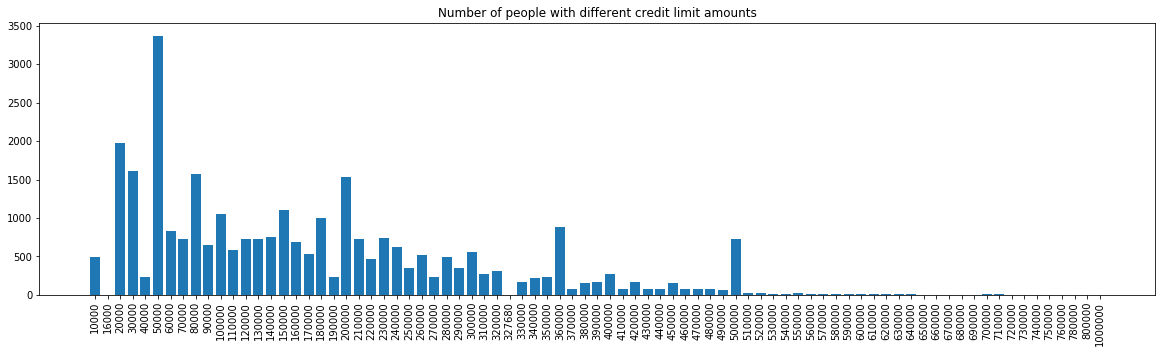

In [17]:
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_subplot(111)

credit_limit_num = default.groupby(['limit_bal']).size()
ax.set_xticks(np.arange(len(credit_limit_num)))
ax.set_xticklabels(['%d' % i for i in credit_limit_num.index], rotation='vertical')
ax.set_title('Number of people with different credit limit amounts')
p = ax.bar(np.arange(len(credit_limit_num)), credit_limit_num)

#### Plot the number of persons with different credit limits (LOG SCALE)

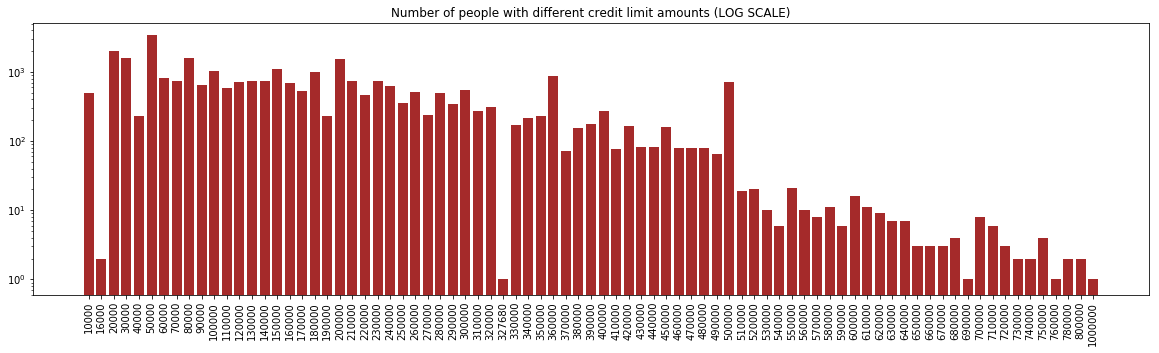

In [18]:
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_subplot(111)

credit_limit_num = default.groupby(['limit_bal']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(credit_limit_num)))
ax.set_xticklabels(['%d' % i for i in credit_limit_num.index], rotation='vertical')
ax.set_title('Number of people with different credit limit amounts (LOG SCALE)')
p = ax.bar(np.arange(len(credit_limit_num)), credit_limit_num, color='brown')

### Default in numbers

The default percentage is: 0.2212


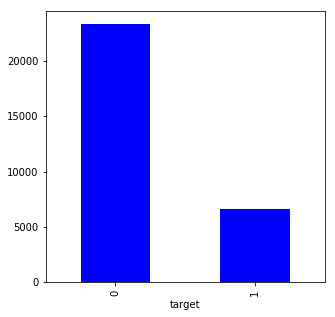

In [19]:
fig = plt.figure()
fig.set_size_inches(5,5)

default_num = default.groupby(['target']).size()

print("The default percentage is: " + str(default_num[1]/(default_num[1]+default_num[0])))

default_num_plot = default_num.plot(kind='bar', color='blue')

#### Dealing with categorical data

##### SEX Category { M (Male) : 1 , F (Female) : 2 }

In [20]:
default['sex'] = default['sex'].astype('category').cat.rename_categories(['M', 'F'])
default.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,target
0,20000,F,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,F,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,90000,F,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,F,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,M,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0
5,50000,M,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,0
6,500000,M,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,0
7,100000,F,2,2,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,0
8,140000,F,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,0
9,20000,M,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,0


##### MARRIAGE Category { na (No status) : 0, married : 1, single : 2, other : 3}

In [21]:
default['marriage'] = default['marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])
default.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,target
0,20000,F,2,married,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,F,2,single,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,90000,F,2,single,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,50000,F,2,married,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,50000,M,2,married,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0
5,50000,M,1,single,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,0
6,500000,M,1,single,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,0
7,100000,F,2,single,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,0
8,140000,F,3,married,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,0
9,20000,M,3,single,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,0


#### Age Categories (steps of 10 years)

In [22]:
default['age_categories'] = pd.cut(default['age'], range(0, 100, 10), right=False)
default.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,target,age_categories
0,20000,F,2,married,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,1,"[20, 30)"
1,120000,F,2,single,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,"[20, 30)"
2,90000,F,2,single,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,"[30, 40)"
3,50000,F,2,married,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,"[30, 40)"
4,50000,M,2,married,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0,"[50, 60)"
5,50000,M,1,single,37,0,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,0,"[30, 40)"
6,500000,M,1,single,29,0,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,0,"[20, 30)"
7,100000,F,2,single,23,0,-1,-1,0,0,...,567,380,601,0,581,1687,1542,0,0,"[20, 30)"
8,140000,F,3,married,28,0,0,2,0,0,...,3719,3329,0,432,1000,1000,1000,0,0,"[20, 30)"
9,20000,M,3,single,35,-2,-2,-2,-2,-1,...,13912,0,0,0,13007,1122,0,0,0,"[30, 40)"


##### Payment Status per month

In [23]:
default_pay_delay = default[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
default_pay_delay_columns = default_pay_delay.columns

for j in default_pay_delay_columns:
    default[j] = default[j].astype('category')

## Statics || Default vs (gender, age group, marriage status)

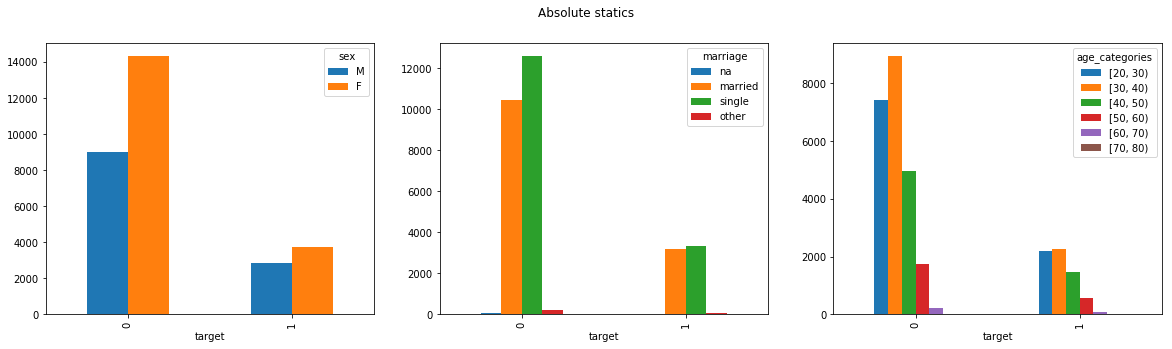

In [24]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Absolute statics')

gender_vs_default = default.groupby(['target', 'sex']).size()
gender_vs_default_plot = gender_vs_default.unstack(level=1).plot(kind='bar', ax=ax[0])

marriage_vs_default = default.groupby(['target', 'marriage']).size()
marriage_vs_default_plot = marriage_vs_default.unstack(level=1).plot(kind='bar', ax=ax[1])

age_cat_vs_default = default.groupby(['target', 'age_categories']).size()
age_cat_vs_default = age_cat_vs_default.unstack(level=1).plot(kind='bar', ax=ax[2])

## Data Preprocessing

##### Pay delay

In [25]:
default_pay_delay = default[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]

default['mean_pay_delay']=default_pay_delay.mean(axis=1)
default['std_pay_delay']=default_pay_delay.std(axis=1)

##### Average payment

In [26]:
default_payment = default[['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']]
default['average_payment'] = default_payment.mean(axis=1)

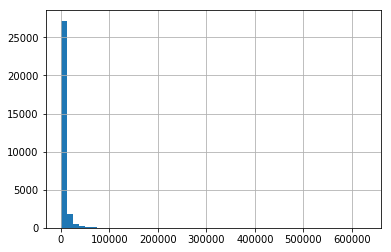

In [27]:
default['average_payment'].hist(bins=50)

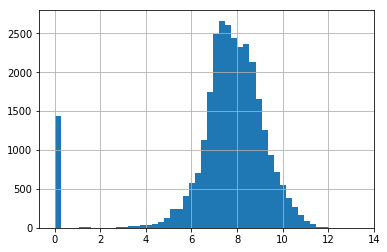

In [28]:
default['average_payment_log'] = default['average_payment'].apply(lambda x: np.log(x+1))
default['average_payment_log'].hist(bins=50)

##### Average payment per month

In [29]:
for i in np.arange(1,7):
    default['pay_relative_'+str(i)] = default['pay_amt'+str(i)]/default['average_payment']

##### Month payment (LOG SCALE)

In [30]:
for i in np.arange(1,7):
    default['pay_amt_'+str(i)+'_log'] = default['pay_amt'+str(i)].apply(lambda x: np.log(x+1))

In [31]:
default.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,pay_relative_3,pay_relative_4,pay_relative_5,pay_relative_6,pay_amt_1_log,pay_amt_2_log,pay_amt_3_log,pay_amt_4_log,pay_amt_5_log,pay_amt_6_log
0,20000,F,2,married,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000
1,120000,F,2,single,26,-1,2,0,0,0,...,1.200000,1.200000,0.000000,2.400000,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402
2,90000,F,2,single,34,0,0,0,0,0,...,0.544563,0.544563,0.544563,2.722817,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393
3,50000,F,2,married,37,0,0,0,0,0,...,0.858369,0.786838,0.764664,0.715308,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755
4,50000,M,2,married,57,-1,0,-1,0,0,...,1.016105,0.914495,0.070010,0.068994,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093
5,50000,M,1,single,37,0,0,0,0,0,...,0.507205,0.772002,0.772002,0.617602,7.824446,7.504392,6.489205,6.908755,6.908755,6.685861
6,500000,M,1,single,29,0,0,0,0,0,...,1.261348,0.671801,0.456409,0.457073,10.915107,10.596660,10.545368,9.915416,9.528867,9.530320
7,100000,F,2,single,23,0,-1,-1,0,0,...,0.000000,0.727614,2.112711,1.931121,5.942799,6.400257,0.000000,6.366470,7.431300,7.341484
8,140000,F,3,married,28,0,0,2,0,0,...,0.383375,0.887443,0.887443,0.887443,8.110728,0.000000,6.070738,6.908755,6.908755,6.908755
9,20000,M,3,single,35,-2,-2,-2,-2,-1,...,0.000000,5.523533,0.476467,0.000000,0.000000,0.000000,0.000000,9.473320,7.023759,0.000000


#### Average Bill

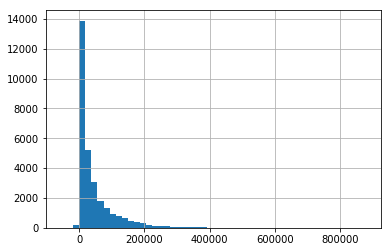

In [32]:
default['average_bill'] = default[['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']].mean(axis=1)
default['average_bill'].hist(bins=50)

##### Average Bill (LOG SCALE)

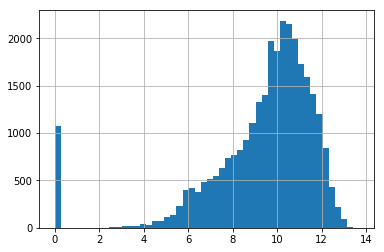

In [33]:
mini = min(default['average_bill'])
#.apply(lambda x: log(x+1) if x>0 else 0)
default['average_bill_log'] = default['average_bill'].apply(lambda x: np.log(x+1) if x> 0 else 0)
default['average_bill_log'].hist(bins=50)

#### Bill balance { 1 : debt balance, 0 : good balance }

In [34]:
for i in np.arange(1,7):
    default['bill_amt_balance'+str(i)] = default['bill_amt'+str(i)].apply(lambda x: float(x>0))

##### Bill balance per month (LOG)

In [35]:
for i in np.arange(1,7):
    default['bill_amt_log'+str(i)] = default['bill_amt'+str(i)].apply(lambda x: np.log(x+1) if x>0 else 0)

##### Bill balance relative to the credit limit

In [36]:
for i in np.arange(1,7):
    default['bill_relative_amt'+str(i)] = default['bill_amt'+str(i)]/default['limit_bal']

#### Credit Limit

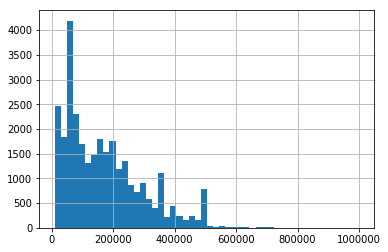

In [37]:
default['limit_bal'].hist(bins=50)

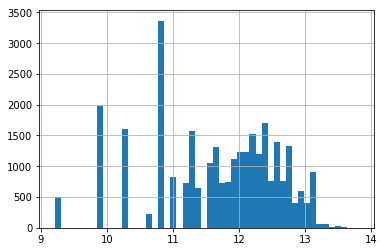

In [38]:
default['limit_bal_log'] = default['limit_bal'].apply(lambda x: np.log(x))
default['limit_bal_log'].hist(bins=50)

In [39]:
default['credit_balance_categories'] = pd.cut(default['limit_bal'], range(0, int(1e6), 10000), right=False)

## X and Y features

In [40]:
default.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month', 'target', 'age_categories',
       'mean_pay_delay', 'std_pay_delay', 'average_payment',
       'average_payment_log', 'pay_relative_1', 'pay_relative_2',
       'pay_relative_3', 'pay_relative_4', 'pay_relative_5', 'pay_relative_6',
       'pay_amt_1_log', 'pay_amt_2_log', 'pay_amt_3_log', 'pay_amt_4_log',
       'pay_amt_5_log', 'pay_amt_6_log', 'average_bill', 'average_bill_log',
       'bill_amt_balance1', 'bill_amt_balance2', 'bill_amt_balance3',
       'bill_amt_balance4', 'bill_amt_balance5', 'bill_amt_balance6',
       'bill_amt_log1', 'bill_amt_log2', 'bill_amt_log3', 'bill_amt_log4',
       'bill_amt_log5', 'bill_amt_log6', 'bill_relative_amt1',
       'bill_re

In [41]:
from patsy import dmatrices

formula = 'target ~ '

## Original features
formula += 'C(sex) + C(marriage) +  C(education) + age + pay_1+pay_2+pay_3+pay_4+pay_5+pay_6'
features = ['sex','education','marriage','age','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']

# Pay dealys average and std
formula += '+' + 'mean_pay_delay + std_pay_delay'
features.append('mean_pay_delay')
features.append('std_pay_delay')

#Categories
formula += '+' + 'C(age_categories)'
formula += '+' + 'C(credit_balance_categories)'
features.append('age_categories')
features.append('credit_balance_categories')

#Pay amount

formula += '+' + 'average_payment_log + pay_relative_1 + pay_relative_2 + pay_relative_3'
formula += '+' + 'pay_relative_4 + pay_relative_5 + pay_relative_6'

formula += '+' + 'pay_amt_1_log + pay_amt_2_log + pay_amt_3_log'
formula += '+' + 'pay_amt_4_log + pay_amt_5_log + pay_amt_6_log'
features.append('average_payment_log')
features.append('pay_relative_1')
features.append('pay_relative_2')
features.append('pay_relative_3')
features.append('pay_relative_4')
features.append('pay_relative_5')
features.append('pay_relative_6')
features.append('pay_amt_1_log')
features.append('pay_amt_2_log')
features.append('pay_amt_3_log')
features.append('pay_amt_4_log')
features.append('pay_amt_5_log')
features.append('pay_amt_6_log')

#Limit_bal_log
formula += '+' + 'limit_bal_log'
features.append('limit_bal_log')

#Bill amount
formula += '+' + 'average_bill_log'
features.append('average_bill_log')

formula += '+' + 'bill_relative_amt1 + bill_relative_amt2 + bill_relative_amt3'
formula += '+' + 'bill_relative_amt4 + bill_relative_amt5 + bill_relative_amt6'

features.append('bill_relative_amt1')
features.append('bill_relative_amt2')
features.append('bill_relative_amt3')
features.append('bill_relative_amt4')
features.append('bill_relative_amt5')
features.append('bill_relative_amt6')

formula += '+' + 'bill_amt_balance1 + bill_amt_balance2 + bill_amt_balance3'
formula += '+' + 'bill_amt_balance4 + bill_amt_balance5 + bill_amt_balance6'
features.append('bill_amt_balance1')
features.append('bill_amt_balance2')
features.append('bill_amt_balance3')
features.append('bill_amt_balance4')
features.append('bill_amt_balance5')
features.append('bill_amt_balance6')

formula += '+' + 'bill_amt_log1 + bill_amt_log2 + bill_amt_log3'
formula += '+' + 'bill_amt_log4 + bill_amt_log5 + bill_amt_log6'
features.append('bill_amt_log1')
features.append('bill_amt_log2')
features.append('bill_amt_log3')
features.append('bill_amt_log4')
features.append('bill_amt_log5')
features.append('bill_amt_log6')

y, X = dmatrices(formula, data=default, return_type='dataframe')


In [42]:
X.head(10)

,Intercept,C(sex)[T.F],C(marriage)[T.married],C(marriage)[T.single],C(marriage)[T.other],C(education)[T.1],C(education)[T.2],C(education)[T.3],C(education)[T.4],C(education)[T.5],...,bill_amt_balance3,bill_amt_balance4,bill_amt_balance5,bill_amt_balance6,bill_amt_log1,bill_amt_log2,bill_amt_log3,bill_amt_log4,bill_amt_log5,bill_amt_log6
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,8.272315,8.040125,6.536692,0.000000,0.000000,0.000000
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,7.894691,7.453562,7.894691,8.093462,8.147867,8.090096
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,10.283293,9.548811,9.514880,9.570250,9.612400,9.651816
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,10.757711,10.783819,10.805517,10.251147,10.273671,10.293771
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,9.061608,8.643121,10.486708,9.949464,9.859901,9.859118
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,11.072884,10.952034,10.961434,9.872771,9.884305,9.904737
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,12.815746,12.928837,13.005848,13.204227,13.087780,13.068847
7,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,9.382359,5.942799,6.400257,5.402677,0.000000,6.342121
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,9.331318,9.553717,9.401704,9.410174,9.375346,8.221479
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,9.473320,9.540579


In [43]:
y = y.values.ravel()

## Functions to plot ROC curve and confusion matrix

In [44]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

### Preprocessing

In [49]:
import warnings
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))

sca = preprocessing.MinMaxScaler()
sca.fit(X)

selec = SelectKBest(f_classif, 30)
selec.fit(X, y)

top_indices = np.nan_to_num(selec.scores_).argsort()[-30:][::-1]
selec.scores_[top_indices]
X.columns[top_indices]

Index(['pay_1[T.2]', 'pay_2[T.2]', 'mean_pay_delay', 'pay_3[T.2]',
       'pay_4[T.2]', 'pay_5[T.2]', 'std_pay_delay', 'pay_6[T.2]', 'pay_1[T.0]',
       'limit_bal_log', 'pay_amt_1_log', 'average_payment_log',
       'bill_relative_amt6', 'pay_2[T.0]', 'bill_relative_amt5',
       'bill_relative_amt4', 'pay_amt_2_log', 'bill_relative_amt3',
       'bill_relative_amt2', 'pay_amt_3_log', 'pay_1[T.3]',
       'bill_relative_amt1', 'pay_2[T.3]', 'pay_3[T.0]', 'pay_amt_4_log',
       'pay_1[T.1]', 'pay_amt_6_log', 'pay_amt_5_log', 'pay_4[T.0]',
       'C(credit_balance_categories)[T.Interval(20000, 30000, closed='left')]'],
      dtype='object')

In [51]:
preprocess = Pipeline([('anova', selec), ('scale', sca)])
preprocess.fit(X,y)

X_proc = preprocess.transform(X)

## ROC and confusion matrix

In [78]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y, y_pred, th=0.5):

    y_pred_labels = (y_pred>th).astype(int)

    fpr, tpr, _ = roc_curve(y,y_pred, pos_label=1)
    print(fpr)
    print(tpr)
    roc_auc = auc(fpr, tpr)
    acc = accuracy_score(y, y_pred_labels)

    ax.plot(fpr, tpr)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    text = 'acc = {:.3f}, auc = {:.2f}'.format(acc, roc_auc)
    ax.legend([text])

# Models

In [53]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

rf = RandomForestClassifier()
gradC = GradientBoostingClassifier()
AdaBoostC = AdaBoostClassifier()
BaggingC = BaggingClassifier()
NB = GaussianNB()
Kneigh = KNeighborsClassifier()


## Naive Bayes

In [54]:
scores = cross_val_score(NB, X_proc, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.77921624 0.78586424 0.79068953 0.77913896 0.79558978 0.78921569
 0.81862745 0.81547619 0.81862745 0.81302521]
0.7985470735566306


0.7985437742850142
[0.         0.13214683 1.        ]
[0.         0.54284307 1.        ]


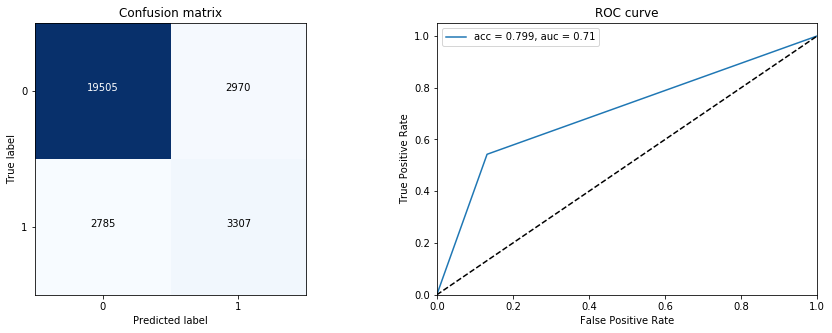

In [79]:
pred_NB = cross_val_predict(NB, X_proc, y, cv=10)
print(metrics.accuracy_score(y, pred_NB))

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
threshold=0.5

plot_cm(ax[0],  y, pred_NB, [0,1], 'Confusion matrix',threshold)
plot_auc(ax[1], y, pred_NB,threshold)

plt.show()

### RandomForestClassifier

In [64]:
scores = cross_val_score(rf, X_proc, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.80475857 0.79986004 0.81099055 0.79943997 0.80889044 0.81652661
 0.82703081 0.82352941 0.81512605 0.82457983]
0.8130732297550812


0.8116708089753912


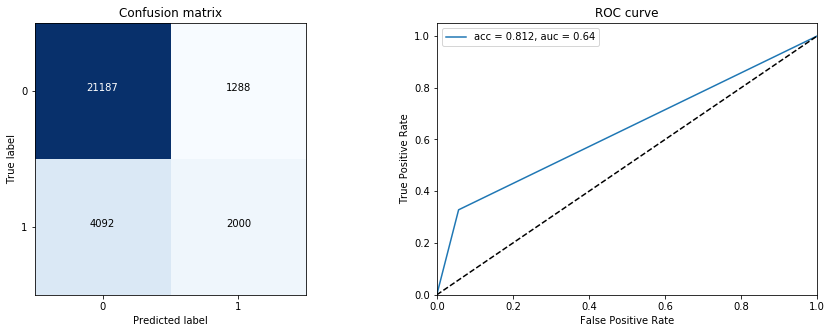

In [63]:
pred_tree = cross_val_predict(rf, X_proc, y, cv=10)
print(metrics.accuracy_score(y, pred_tree))

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
threshold = 0.5

plot_cm(ax[0],  y, pred_tree, [0,1], 'Confusion matrix',threshold)
plot_auc(ax[1], y, pred_tree, threshold)

plt.show()

### Gradient Boosting Classifier

In [66]:
scores = cross_val_score(gradC, X_proc, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.81420574 0.81420574 0.82114106 0.81064053 0.82569128 0.82913165
 0.84068627 0.83823529 0.83928571 0.83123249]
0.8264455778772145


0.8264430986802954


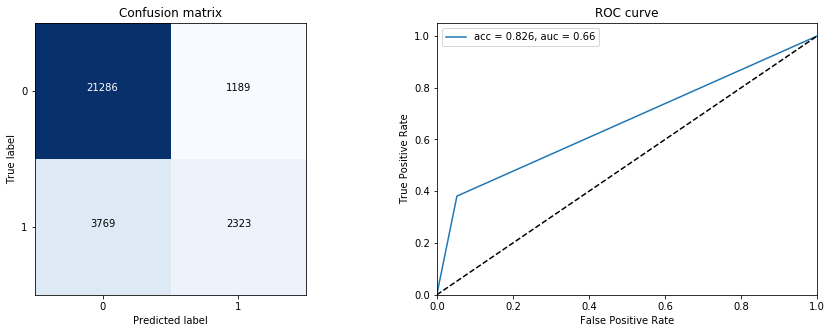

In [67]:
pred_gradC = cross_val_predict(gradC, X_proc, y, cv=10)
print(metrics.accuracy_score(y, pred_gradC))

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
threshold = 0.5

plot_cm(ax[0],  y, pred_gradC, [0,1], 'Confusion matrix', threshold)
plot_auc(ax[1], y, pred_gradC, threshold)

plt.show()

### Ada Boost Classifier

In [68]:
scores = cross_val_score(AdaBoostC, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.80545836 0.81630511 0.82254113 0.81344067 0.81834092 0.82948179
 0.83963585 0.83053221 0.82948179 0.82983193]
0.8235049772528693


0.8246228165365632


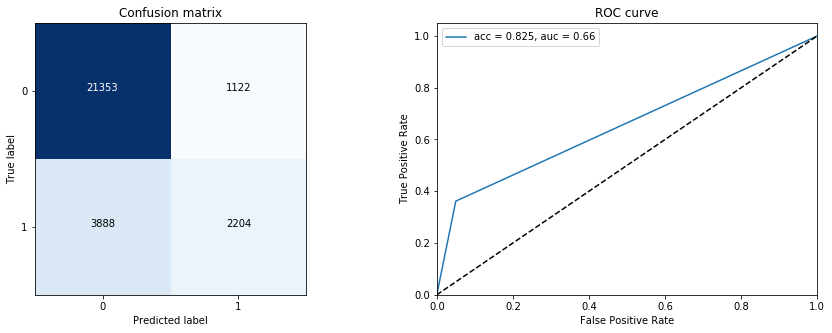

In [69]:
pred_AdaBoostC = cross_val_predict(AdaBoostC, X_proc, y, cv=10)
print(metrics.accuracy_score(y, pred_AdaBoostC))

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
threshold = 0.5

plot_cm(ax[0],  y, pred_AdaBoostC, [0,1], 'Confusion matrix', threshold)
plot_auc(ax[1], y, pred_AdaBoostC, threshold)

plt.show()

## Bagging Classifier

In [70]:
scores = cross_val_score(BaggingC, X_proc, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.80195941 0.79951015 0.8060903  0.79908995 0.81274064 0.81022409
 0.83298319 0.81547619 0.81757703 0.81162465]
0.8107275609238688


0.8098505268316589


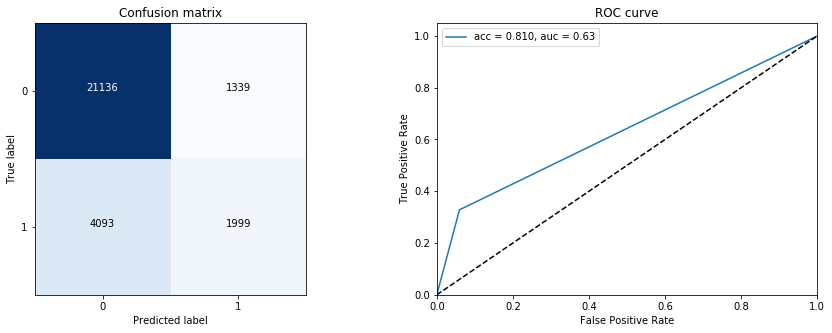

In [71]:
pred_BaggingC = cross_val_predict(BaggingC, X_proc, y, cv=10)
print(metrics.accuracy_score(y, pred_BaggingC))

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
threshold = 0.5

plot_cm(ax[0],  y, pred_BaggingC, [0,1], 'Confusion matrix', threshold)
plot_auc(ax[1], y, pred_BaggingC, threshold)

plt.show()

## K neighbors

In [72]:
scores = cross_val_score(Kneigh, X_proc, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.7886634  0.79951015 0.80119006 0.79418971 0.80924046 0.80602241
 0.81932773 0.82037815 0.81547619 0.81022409]
0.8064222350375742


0.8064199950992403


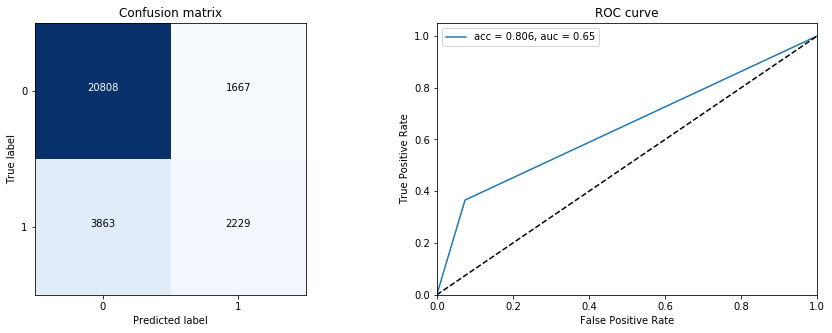

In [73]:
pred_Kneigh = cross_val_predict(Kneigh, X_proc, y, cv=10)
print(metrics.accuracy_score(y, pred_Kneigh))

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
threshold = 0.5

plot_cm(ax[0],  y, pred_Kneigh, [0,1], 'Confusion matrix', threshold)
plot_auc(ax[1], y, pred_Kneigh, threshold)

plt.show()